In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [2]:
toy = datasets.make_blobs(centers = 3, n_features = 4)

In [3]:
X = toy[0]
Y = toy[1]

In [4]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

C:\Users\Wong Kam Pui\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


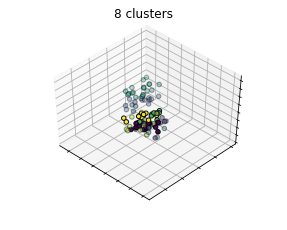

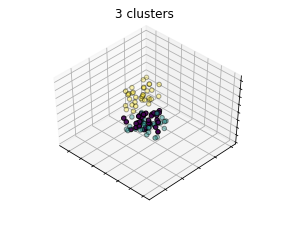

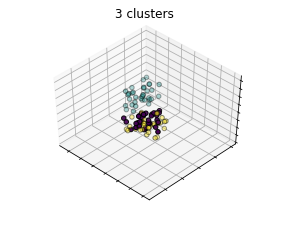

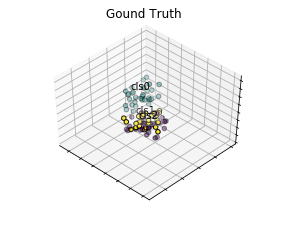

In [14]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters', 'bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize = (4,3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev = 48, azim = 134)
    
    ##fit data
    est.fit(X)
    
    labels = est.labels_
    ax.scatter(X[:,3], X[:, 0], X[:,2],
               c = labels.astype(np.float), edgecolor = 'k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum -1])
    ax.dist = 12
    fignum +=1
    
fig = plt.figure(fignum, figsize = (4,3))
ax = Axes3D(fig, rect =[0, 0, .95, 1], elev = 48, azim = 134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[Y == label, 3].mean(),
              X[Y == label, 0].mean(),
              X[Y == label, 2].mean() + 2, name,
              horizontalalignment = 'center',
              bbox = dict(alpha = .2, edgecolor = 'w', facecolor = 'w'))
    
Y = np.choose(Y, [1,2,0]).astype(np.float)
ax.scatter(X[:,3], X[:,0], X[:,2], c = Y, edgecolor = 'k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Gound Truth')
ax.dist = 12

fig.show()
